In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Получите данные и загрузите их в рабочую среду

In [340]:
from sklearn.datasets import fetch_california_housing

In [435]:
dataset = fetch_california_housing(as_frame=True)
df = dataset.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [384]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [385]:
df.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [433]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import metrics

In [434]:
def get_score(df):
    X = df.drop(['MedHouseVal'], axis=1)
    Y = df['MedHouseVal']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2 = metrics.r2_score(y_test, y_pred)

    return rmse, r2

In [436]:
get_score(df)

(0.7561753781213171, 0.5743251711424044)

Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

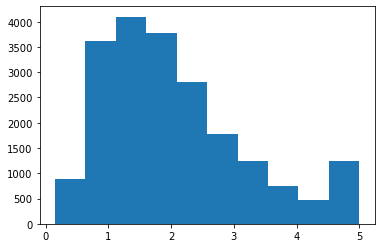

In [437]:
Y = df['MedHouseVal']
plt.hist(Y); # график распределения целевой переменной 

c:\Users\Maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MedHouseVal'>

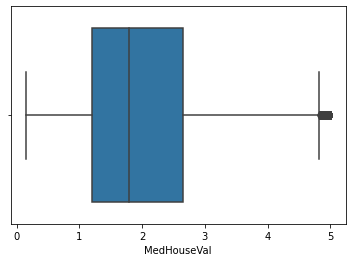

In [440]:
sns.boxplot(Y)

In [441]:
IQR = Y.quantile(0.75) - Y.quantile(0.25)
lower_bound = Y.quantile(0.25) - 1.5 * IQR
upper_bound = Y.quantile(0.75) + 1.5 * IQR

In [442]:
df1 = df[ df.MedHouseVal < upper_bound ][ df.MedHouseVal > lower_bound ]

<ipython-input-442-2785644683ad>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[ df.MedHouseVal < upper_bound ][ df.MedHouseVal > lower_bound ]


In [444]:
get_score(df1) # одна метрика улучшилась, вторая ухудшилась

(0.6081320519034371, 0.5914852268055428)

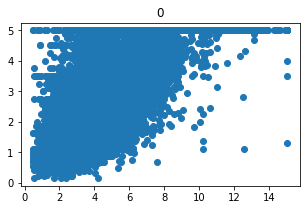

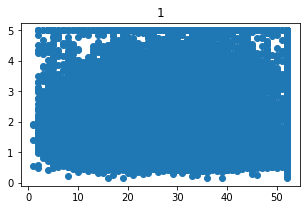

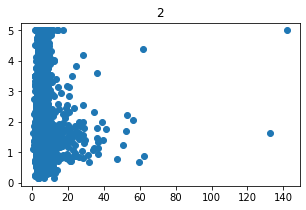

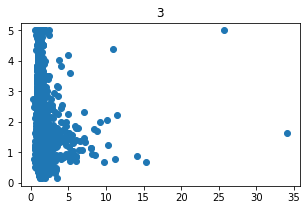

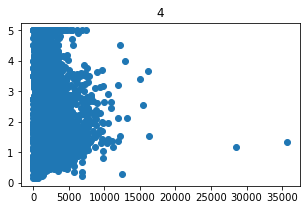

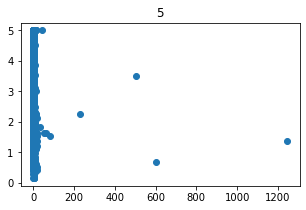

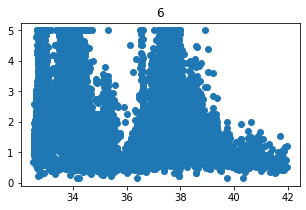

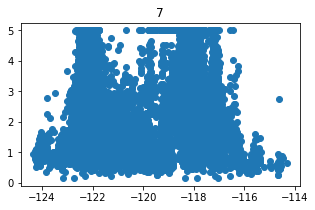

In [445]:
for i in range(len(X.columns)):
    plt.figure(figsize=[5, 3])
    plt.scatter(X.iloc[:, [i]], Y)
    plt.title(str(i))


        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

In [451]:
df2 = df1.sort_values(by='AveRooms').iloc[:-2, :]
get_score(df2)

(0.6262460277177291, 0.5775052925875601)

In [452]:
X2 = df2.drop(['MedHouseVal'], axis=1)
Y2 = df2['MedHouseVal']

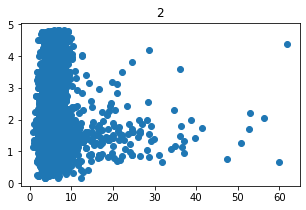

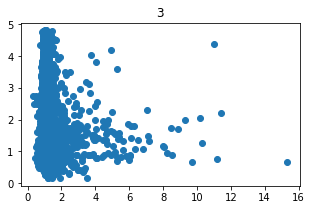

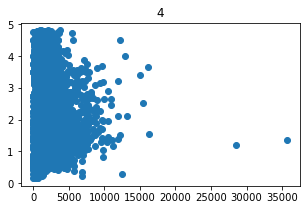

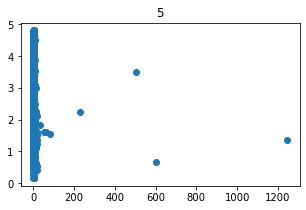

In [453]:
for i in range(2, 6):
    plt.figure(figsize=[5, 3])
    plt.scatter(X2.iloc[:, [i]], Y2)
    plt.title(str(i))

In [454]:
df3 = df2.sort_values(by='Population').iloc[:-2, :]
X3 = df3.drop(['MedHouseVal'], axis=1)
Y3 = df3['MedHouseVal']

get_score(df3)

(0.6103987328687902, 0.5842959290622849)

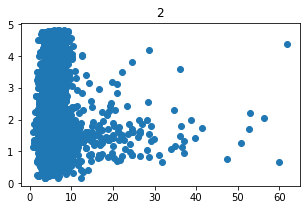

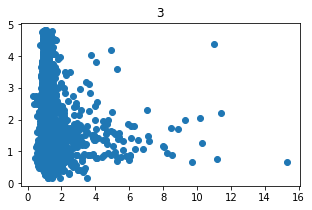

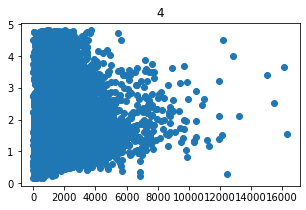

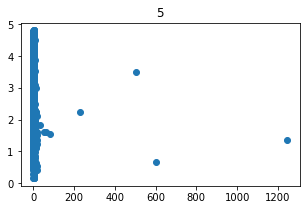

In [456]:
for i in range(2, 6):
    plt.figure(figsize=[5, 3])
    plt.scatter(X3.iloc[:, [i]], Y3)
    plt.title(str(i))

In [460]:
df4 = df3.sort_values(by='AveOccup').iloc[:-8, :]
X4 = df4.drop(['MedHouseVal'], axis=1)
Y4 = df4['MedHouseVal']
get_score(df4)

(0.5855121515662719, 0.6210545897189064)

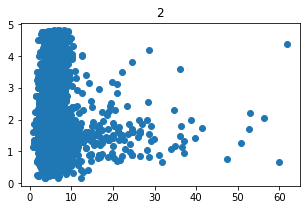

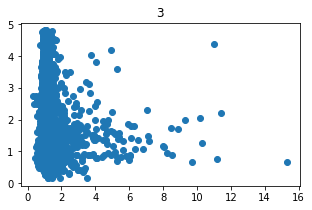

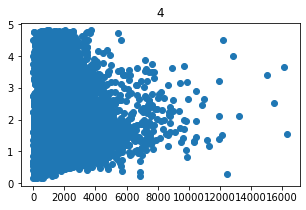

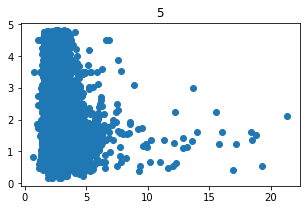

In [461]:
for i in range(2, 6):
    plt.figure(figsize=[5, 3])
    plt.scatter(X4.iloc[:, [i]], Y4)
    plt.title(str(i))

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

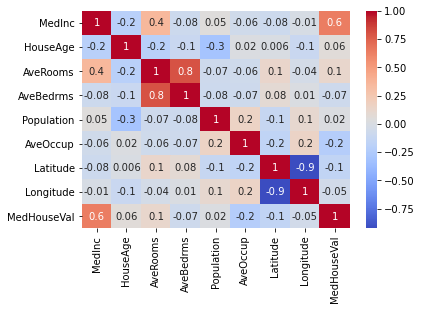

In [462]:
sns.heatmap(df4.corr(), annot = True, fmt='.1g', cmap='coolwarm');

Наименьшее влияние имеют признаки HouseAge, AveBedrms, Population, Longitude

In [480]:
get_score(df4.drop(['HouseAge', 'AveBedrms', 'Population', 'Longitude'], axis=1)) #стало хуже, не понимаю, почему))

(0.6873856958212351, 0.4777171002018351)